<a href="https://colab.research.google.com/github/JuDRoll/visualizacao-dados-python-3385168/blob/main/arvore_de_decisao_ar_poluicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#instalação das bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#acesso ao dataset
from sklearn.datasets import fetch_openml

#classes do modelo de aprendizado
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

#funções de avaliação dos modelos
from sklearn.metrics import classification_report, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [7]:
#fetch dataset
X,y = fetch_openml(data_id=46880, return_X_y=True)

dataset = pd.concat([X,y], axis=1)

dataset.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [8]:
#definindo semente
seed=27

# Seleciona todos os campos menos a classe alvo para a variável "X".
X = dataset.iloc[:,:-1]
y = dataset.loc[:,"Air_Quality"]

#separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)
print(X_train.shape)
print(X_test.shape)

(4500, 9)
(500, 9)


GINI
MAX_DEPTH - 3 
 
              precision    recall  f1-score   support

        Good       1.00      0.98      0.99       200
   Hazardous       0.79      0.56      0.65        61
    Moderate       0.89      0.92      0.91       148
        Poor       0.64      0.77      0.70        91

    accuracy                           0.87       500
   macro avg       0.83      0.81      0.81       500
weighted avg       0.88      0.87      0.87       500



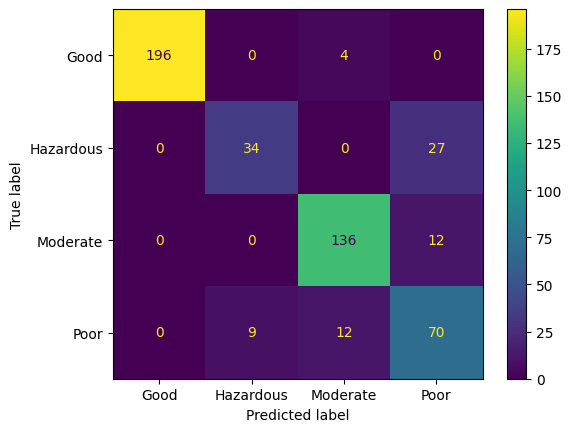

GINI
MAX_DEPTH - 4 
 
              precision    recall  f1-score   support

        Good       1.00      0.98      0.99       200
   Hazardous       0.81      0.70      0.75        61
    Moderate       0.92      0.90      0.91       148
        Poor       0.69      0.81      0.75        91

    accuracy                           0.89       500
   macro avg       0.86      0.85      0.85       500
weighted avg       0.90      0.89      0.89       500



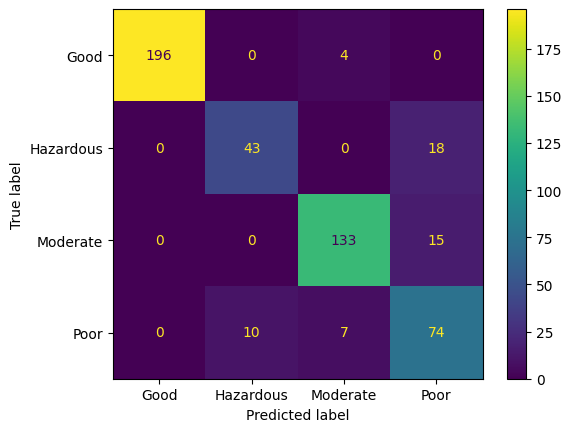

GINI
MAX_DEPTH - 5 
 
              precision    recall  f1-score   support

        Good       1.00      0.98      0.99       200
   Hazardous       0.89      0.64      0.74        61
    Moderate       0.91      0.92      0.92       148
        Poor       0.69      0.85      0.76        91

    accuracy                           0.90       500
   macro avg       0.87      0.85      0.85       500
weighted avg       0.90      0.90      0.90       500



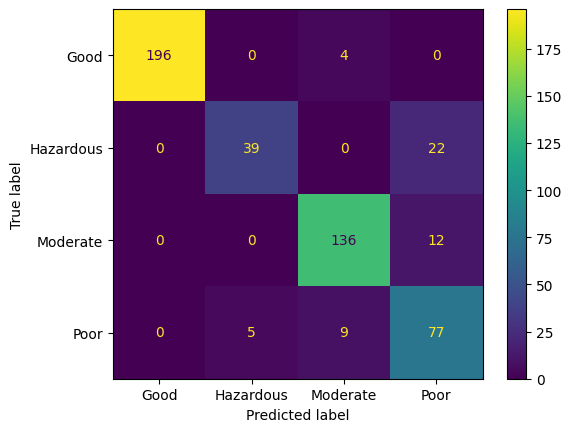

ENTROPY
MAX_DEPTH - 3 
 
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       200
   Hazardous       0.79      0.56      0.65        61
    Moderate       0.92      0.92      0.92       148
        Poor       0.64      0.77      0.70        91

    accuracy                           0.88       500
   macro avg       0.84      0.81      0.82       500
weighted avg       0.89      0.88      0.88       500



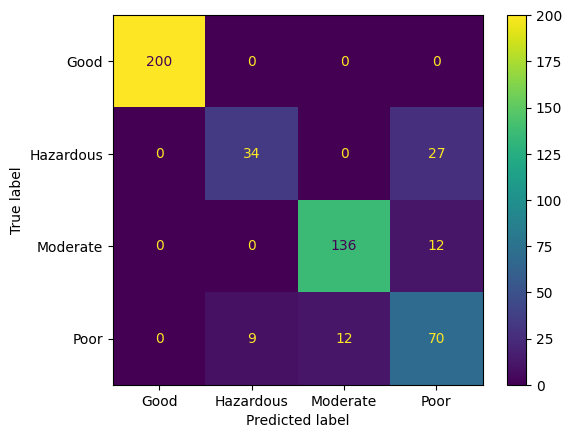

ENTROPY
MAX_DEPTH - 4 
 
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       200
   Hazardous       0.82      0.69      0.75        61
    Moderate       0.92      0.92      0.92       148
        Poor       0.69      0.77      0.73        91

    accuracy                           0.90       500
   macro avg       0.86      0.84      0.85       500
weighted avg       0.90      0.90      0.90       500



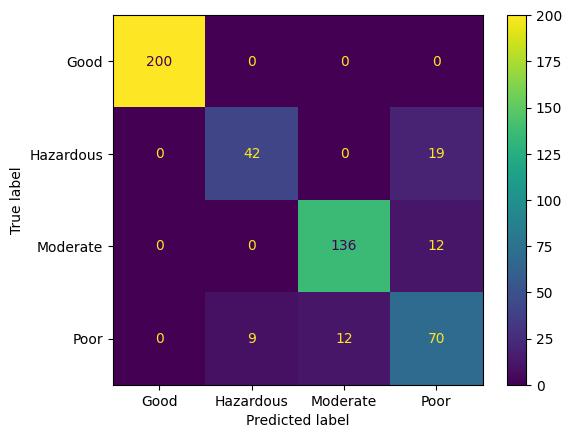

ENTROPY
MAX_DEPTH - 5 
 
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       200
   Hazardous       0.90      0.62      0.74        61
    Moderate       0.93      0.91      0.92       148
        Poor       0.68      0.85      0.75        91

    accuracy                           0.90       500
   macro avg       0.88      0.84      0.85       500
weighted avg       0.91      0.90      0.90       500



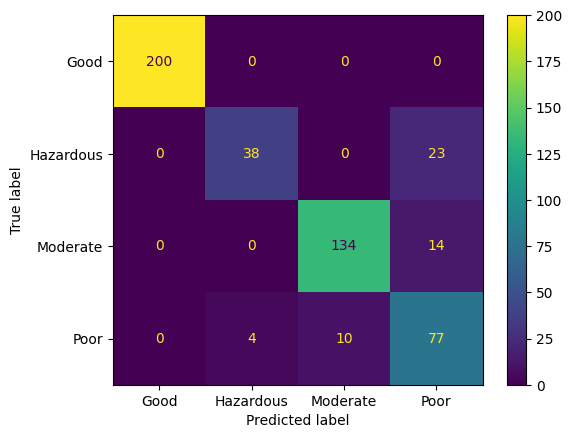

In [9]:
#loop para teste utilizando diversos criterion e max_depth
for i, criterion in enumerate(['gini', 'entropy']):

    for j, max_depth in enumerate([3,4,5]):

      print(criterion.upper())
      print(f"MAX_DEPTH - {max_depth} \n ")

      model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=seed)

      #treinando o modelo
      model.fit(X_train, y_train)

      #predição
      y_pred = model.predict(X_test)

      #relatório do classificador
      print(classification_report(y_test, y_pred))

      #calcula a matriz de confusão de acordo com os parâmetros acima
      cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
      disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

      disp_cm.plot()

      plt.show()
